# 01. Carga de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import sklearn
import os

sns.set(style="whitegrid", color_codes = True)
sns.set_palette('pastel')
sns.set(rc={'figure.figsize':(10,6)})

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Configuración de gráficos matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

drive.mount('gdrive')

Mounted at gdrive


# 02. Carga de dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/data.csv')
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [ ]:
# Corrección de los nombres de las variables

def clean_col_names(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name


In [ ]:
df.rename(columns = {"Bankrupt?" : "Bankrupt"}, inplace = True)
df_columns = list(df.columns)
df_columns = [clean_col_names(col_name) for col_name in df_columns]
df.columns = df_columns
display(df.columns)

Index(['bankrupt', 'roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit_

In [ ]:
print(' El dataset tiene ', df.shape[0],' observaciones y ',df.shape[1],' variables incluido el target')

 El dataset tiene  6819  observaciones y  96  variables incluido el target


In [ ]:
df.head(3)

bankrupt  roa_c_before_interest_and_depreciation_before_interest  \
0         1                                           0.370594        
1         1                                           0.464291        
2         1                                           0.426071        

   roa_a_before_interest_and_%_after_tax  \
0                               0.424389   
1                               0.538214   
2                               0.499019   

   roa_b_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                          0.405750                0.601457   
1                                          0.516730                0.610235   
2                                          0.472295                0.601450   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   

   non_industry_income_and_expenditure_revenue  ...  \
0                                     0.302646  ...   
1                                     0.303556  ...   
2                                     0.302035  ...   

   net_income_to_total_assets  total_assets_to_gnp_price  no_credit_interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   

   gross_profit_to_sales  net_income_to_stockholders_equity  \
0               0.601453                           0.827890   
1               0.610237                           0.839969   
2               0.601449                           0.836774   

   liability_to_equity  degree_of_financial_leverage_dfl_  \
0             0.290202                           0.026601   
1             0.283846                           0.264577   
2             0.290189                           0.026555   

   interest_coverage_ratio_interest_expense_to_ebit_  net_income_flag  \
0                                           0.564050                1   
1                                           0.570175                1   
2                                           0.563706                1   

   equity_to_liability  
0             0.016469  
1             0.020794  
2             0.016474  

[3 rows x 96 columns]

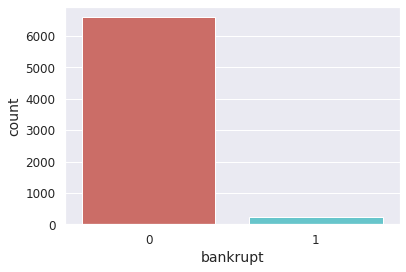

In [ ]:
# Analizando el target
sns.countplot(x='bankrupt', data = df, palette = 'hls')

# 03. Tipificacion de variables

In [ ]:
# Buscando todas las variables tipo flag por el nombre de estas
list_vars = df.columns
vars_flag = [x for x in list_vars if 'flag' in x]
vars_flag

['liability_assets_flag', 'net_income_flag']

In [ ]:
# Tipificacion de variables flag como object
df.liability_assets_flag.unique()

array([0, 1])

In [ ]:
df['liability_assets_flag'] = np.where(df['liability_assets_flag']==1,'Si','No')
df.liability_assets_flag.unique()

array(['No', 'Si'], dtype=object)

In [ ]:
df.groupby('liability_assets_flag').liability_assets_flag.agg(['count'])

count
liability_assets_flag       
No                      6811
Si                         8

In [ ]:
df.net_income_flag.unique()
# Esta variable se eliminará por tener un solo valor par la poblacion analizada

array([1])

In [ ]:
df2 = df.drop(['net_income_flag'], axis=1)
df2.shape

(6819, 95)

In [ ]:
vars_info = ['bankrupt']

In [ ]:
# Indentificar las variables
features = list(set(df2.columns.tolist()) - set(['bankrupt']))

# 04. Dividiendo en data de Train y Test

In [ ]:
X = df2[features + ['bankrupt']]
y = df2.bankrupt

In [ ]:
X.shape

(6819, 95)

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y,
                                                    stratify = y,
                                                    train_size = 0.70,
                                                    random_state = 202301)

# Muestreo de la data a partir del X_test1 exclusivamente para el algoritmo de XGBoost
X_watch, X_test, y_watch, y_test = train_test_split(X_test1, y_test1,
                                                    stratify = y_test1,
                                                    train_size = 0.5,
                                                    random_state = 202301)

In [ ]:
print('Nro observaciones data Train: ',X_train.shape[0])
print('Nro observaciones data Test: ' ,X_test1.shape[0])
print('Nro observaciones data Dev: '  ,X_watch.shape[0])
print('Nro observaciones data Test XGBoost: ',X_test.shape[0])

Nro observaciones data Train:  4773
Nro observaciones data Test:  2046
Nro observaciones data Dev:  1023
Nro observaciones data Test XGBoost:  1023


# 05. Separacion en variables categoricas y numericas

In [ ]:
df['liability_assets_flag'] = np.where(df['liability_assets_flag']==1,'Si','No')
df.liability_assets_flag.unique()

array(['No'], dtype=object)

In [ ]:
numeric_features = list(df2.drop(vars_info,axis = 1).select_dtypes('number'))
categorical_features = list(df2.drop(vars_info,axis = 1).select_dtypes('object'))

print(' Cantidad de variables numericas: ', len(numeric_features))
print(' Cantidad de variables categoricas: ', len(categorical_features))
print(' Cantidad de variables informativas: ',len(vars_info))
print(' Cantidad de variables totales: ', df2.shape[1])

 Cantidad de variables numericas:  93
 Cantidad de variables categoricas:  1
 Cantidad de variables informativas:  1
 Cantidad de variables totales:  95


# 06. Analisis univariado para la data Train

## 6.1. Analisis univariado para variables numericas

In [ ]:
df_univariado_numeric = X_train[numeric_features].describe().T
df_univariado_numeric['FillRate'] = df_univariado_numeric['count']/X_train.shape[0]*100
df_univariado_numeric.reset_index(inplace = True)
df_univariado_numeric.rename(columns = {'index': 'feature',
                         '25%': 'Q1',
                         '50%': 'Median',
                         '75%': 'Q3'}, inplace = True)
df_univariado_numeric.head()

feature   count      mean  \
0  roa_c_before_interest_and_depreciation_before_...  4773.0  0.505382   
1              roa_a_before_interest_and_%_after_tax  4773.0  0.558601   
2   roa_b_before_interest_and_depreciation_after_tax  4773.0  0.553863   
3                             operating_gross_margin  4773.0  0.607920   
4                        realized_sales_gross_margin  4773.0  0.607897   

        std       min        Q1    Median        Q3  max  FillRate  
0  0.061315  0.024277  0.476186  0.503632  0.536002  1.0     100.0  
1  0.066099  0.000000  0.535434  0.560183  0.590166  1.0     100.0  
2  0.062240  0.033514  0.527384  0.552760  0.585256  1.0     100.0  
3  0.016320  0.156308  0.600484  0.605882  0.613838  1.0     100.0  
4  0.016301  0.156308  0.600463  0.605825  0.613694  1.0     100.0

## Calculo del Gini con missings

In [ ]:
ginisMean = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(X_train[col].mean()))*2-1 for col in numeric_features]

In [ ]:
ginisMedian = [sklearn.metrics.roc_auc_score(y_train, X_train[col].fillna(X_train[col].median()))*2-1 for col in numeric_features]

## Calculo del Gini sin missings

In [ ]:
temp = X_train.copy()
temp['y'] = y_train

ginisNan = [sklearn.metrics.roc_auc_score(temp[['y', col]].dropna().y, temp[['y', col]].dropna()[col])*2-1 for col in numeric_features]

In [ ]:
df_ginis = pd.DataFrame({'feature' : numeric_features,
                          'giniMean' : ginisMean,
                         'giniMedian' : ginisMedian,
                          'giniNan'  : ginisNan})

In [ ]:
df_univariado_numeric2 = pd.merge(df_univariado_numeric, df_ginis, on = 'feature', how='left')
df_univariado_numeric2.head()

feature   count      mean  \
0  roa_c_before_interest_and_depreciation_before_...  4773.0  0.505382   
1              roa_a_before_interest_and_%_after_tax  4773.0  0.558601   
2   roa_b_before_interest_and_depreciation_after_tax  4773.0  0.553863   
3                             operating_gross_margin  4773.0  0.607920   
4                        realized_sales_gross_margin  4773.0  0.607897   

        std       min        Q1    Median        Q3  max  FillRate  giniMean  \
0  0.061315  0.024277  0.476186  0.503632  0.536002  1.0     100.0 -0.747112   
1  0.066099  0.000000  0.535434  0.560183  0.590166  1.0     100.0 -0.731981   
2  0.062240  0.033514  0.527384  0.552760  0.585256  1.0     100.0 -0.744611   
3  0.016320  0.156308  0.600484  0.605882  0.613838  1.0     100.0 -0.447952   
4  0.016301  0.156308  0.600463  0.605825  0.613694  1.0     100.0 -0.443268   

   giniMedian   giniNan  
0   -0.747112 -0.747112  
1   -0.731981 -0.731981  
2   -0.744611 -0.744611  
3   -0.447952 -0.447952  
4   -0.443268 -0.443268

In [ ]:
# Ordenando variables por importancia de explicación

df_univariado_numeric2['abs_giniMean'] = df_univariado_numeric2.giniMean.apply(lambda x: abs(x))
df_univariado_numeric2['abs_giniMedian'] = df_univariado_numeric2.giniMedian.apply(lambda x: abs(x))
df_univariado_numeric2['abs_giniNan'] = df_univariado_numeric2.giniNan.apply(lambda x: abs(x))

df_univariado_numeric2['abs_ginimax'] = df_univariado_numeric2[['abs_giniMean', 'abs_giniMedian','abs_giniNan']].max(axis = 1)
df_univariado_numeric2.sort_values('abs_ginimax', ascending = False)

feature   count          mean  \
18  persistent_eps_in_the_last_four_seasons  4773.0  2.289711e-01   
42    net_profit_before_tax_paid_in_capital  4773.0  1.827533e-01   
22  per_share_net_profit_before_tax_yuan_¥_  4773.0  1.844957e-01   
84               net_income_to_total_assets  4773.0  8.077383e-01   
67        retained_earnings_to_total_assets  4773.0  9.344812e-01   
..                                      ...     ...           ...   
71                quick_asset_turnover_rate  4773.0  2.156236e+09   
50                       revenue_per_person  4773.0  3.322858e+06   
10                   operating_expense_rate  4773.0  2.015676e+09   
47           inventory_turnover_rate_times_  4773.0  2.084767e+09   
49           net_worth_turnover_rate_times_  4773.0  3.878361e-02   

             std  min        Q1    Median            Q3           max  \
18  3.440793e-02  0.0  0.214617  0.224544  2.393873e-01  1.000000e+00   
42  3.179056e-02  0.0  0.169339  0.178576  1.916598e-01  1.000000e+00   
22  3.455461e-02  0.0  0.170294  0.179785  1.936431e-01  1.000000e+00   
84  4.052499e-02  0.0  0.796713  0.810753  8.267187e-01  9.813151e-01   
67  2.721154e-02  0.0  0.930904  0.937707  9.449227e-01  1.000000e+00   
..           ...  ...       ...       ...           ...           ...   
71  3.361449e+09  0.0  0.000141  0.000224  4.920000e+09  1.000000e+10   
50  1.633074e+08  0.0  0.010437  0.018616  3.586505e-02  8.810000e+09   
10  3.246476e+09  0.0  0.000157  0.000281  4.220000e+09  9.980000e+09   
47  3.226370e+09  0.0  0.000172  0.000683  4.410000e+09  9.990000e+09   
49  3.702219e-02  0.0  0.021935  0.029677  4.306452e-02  8.477419e-01   

    FillRate  giniMean  giniMedian   giniNan  abs_giniMean  abs_giniMedian  \
18     100.0 -0.783651   -0.783651 -0.783651      0.783651        0.783651   
42     100.0 -0.766154   -0.766154 -0.766154      0.766154        0.766154   
22     100.0 -0.763939   -0.763939 -0.763939      0.763939        0.763939   
84     100.0 -0.763636   -0.763636 -0.763636      0.763636        0.763636   
67     100.0 -0.754127   -0.754127 -0.754127      0.754127        0.754127   
..       ...       ...         ...       ...           ...             ...   
71     100.0  0.062763    0.062763  0.062763      0.062763        0.062763   
50     100.0  0.051864    0.051864  0.051864      0.051864        0.051864   
10     100.0  0.051525    0.051525  0.051525      0.051525        0.051525   
47     100.0  0.035247    0.035247  0.035247      0.035247        0.035247   
49     100.0 -0.026521   -0.026521 -0.026521      0.026521        0.026521   

    abs_giniNan  abs_ginimax  
18     0.783651     0.783651  
42     0.766154     0.766154  
22     0.763939     0.763939  
84     0.763636     0.763636  
67     0.754127     0.754127  
..          ...          ...  
71     0.062763     0.062763  
50     0.051864     0.051864  
10     0.051525     0.051525  
47     0.035247     0.035247  
49     0.026521     0.026521  

[93 rows x 17 columns]

In [ ]:
df_univariado_numeric2.to_csv('univariado_numericas_bankrupt.csv', index = 0)

### Analisis univariado para variables categoricas

In [ ]:
df_univariado_categoric = X_train[categorical_features].describe().T
df_univariado_categoric['FillRate'] = df_univariado_categoric['count']/X_train.shape[0]*100
df_univariado_categoric.reset_index(inplace = True)
df_univariado_categoric.rename(columns = {'index': 'feature',
                         'unique': 'unique_values'}, inplace = True)
df_univariado_categoric

feature count unique_values top  freq FillRate
0  liability_assets_flag  4773             2  No  4768    100.0

## Calculo del Gini con missings

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.8 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
te = TargetEncoder()

In [ ]:
ginisMode= [sklearn.metrics.roc_auc_score(y_train,
                                           te.fit_transform(X_train[col].fillna(X_train[col].mode().iloc[0]),
                                                            y_train))*2-1 for col in categorical_features]

## Calculo del Gini sin missings

In [ ]:
temp2 = X_train.copy()
temp2['y'] = y_train
te2 = TargetEncoder()

ginisNan_cat = [sklearn.metrics.roc_auc_score(temp2[['y', col]].dropna().y,
                                          te2.fit_transform(temp2[['y', col]].dropna()[col],temp2[['y', col]].dropna().y))*2-1 for col in categorical_features]

In [ ]:
df_ginis_cat = pd.DataFrame({'feature' : categorical_features,
                          'giniMode' : ginisMode,
                          'giniNan'  : ginisNan_cat})

In [ ]:
df_univariado_categoric2 = pd.merge(df_univariado_categoric, df_ginis_cat, on = 'feature', how='left')
df_univariado_categoric2.head()

feature count unique_values top  freq FillRate  giniMode  \
0  liability_assets_flag  4773             2  No  4768    100.0  0.019048   

    giniNan  
0  0.019048

In [ ]:
# Ordenando variables por importancia de explicación

df_univariado_categoric2['abs_giniMode'] = df_univariado_categoric2.giniMode.apply(lambda x: abs(x))
df_univariado_categoric2['abs_giniNan'] = df_univariado_categoric2.giniNan.apply(lambda x: abs(x))

df_univariado_categoric2['abs_ginimax'] = df_univariado_categoric2[['abs_giniMode','abs_giniNan']].max(axis = 1)
df_univariado_categoric2.sort_values('abs_ginimax', ascending = False)

feature count unique_values top  freq FillRate  giniMode  \
0  liability_assets_flag  4773             2  No  4768    100.0  0.019048   

    giniNan  abs_giniMode  abs_giniNan  abs_ginimax  
0  0.019048      0.019048     0.019048     0.019048

# 07. Primera preseleccion de variables por Gini - Fill rate - umbral gini 5%

In [ ]:
features_univ = features
features_drop_univar = ['liability_assets_flag','inventory_turnover_rate_times_','net_worth_turnover_rate_times_']
features_post_univ = [x for x in features_univ if x not in set(features_drop_univar)]
print('Cantidad de features pre univariado: ', len(features_univ))
print('Cantidad de variables que no pasan el univariado: ',len(features_drop_univar))
print('Cantidad de variables post filtro univariado: ', len(features_post_univ))

Cantidad de features pre univariado:  94
Cantidad de variables que no pasan el univariado:  3
Cantidad de variables post filtro univariado:  91


# 08. Analisis bivariado

In [ ]:
numeric_features_post_univ = [x for x in numeric_features if x in features_post_univ]

In [ ]:
def getGraficaBivariado_varNumericas(df,var,target):
  var_decil = pd.qcut(df[var],q=10,duplicates='drop',labels=False)
  temp_bivar = pd.DataFrame({f'{var}_decil':var_decil,'TARGET':df[target]})
  temp_bivar[var+'_decil'] = np.where(temp_bivar[var+'_decil'].isnull(),'MISSING',temp_bivar[var+'_decil'])

  G1 = temp_bivar.groupby(f'{var}_decil')[f'{var}_decil'].count()
  G2 = temp_bivar.groupby(f'{var}_decil')['TARGET'].mean()

  fig , ax = plt.subplots()
  ax.bar(G1.index,G1)
  ax2 = ax.twinx()
  ax2.plot(G2.index,G2,color='r')

  titulo = 'Variable '+var+' vs RD'
  plt.legend(['Ratio de default'])
  plt.title(titulo)

<ipython-input-42-08281c97ae4e>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig , ax = plt.subplots()
<ipython-input-42-08281c97ae4e>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig , ax = plt.subplots()
<ipython-input-42-08281c97ae4e>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig , ax = plt.subplots()
<ipy

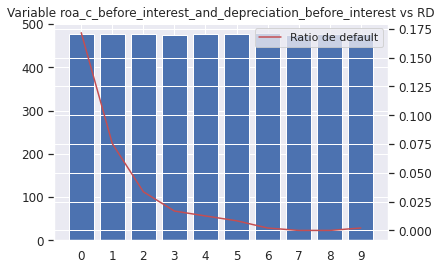

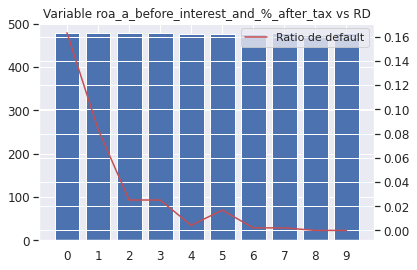

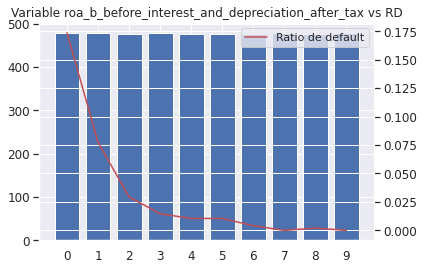

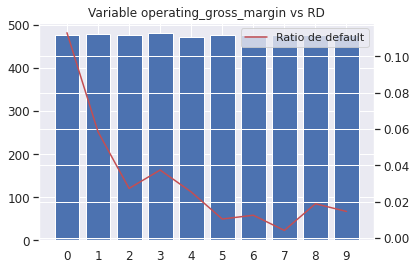

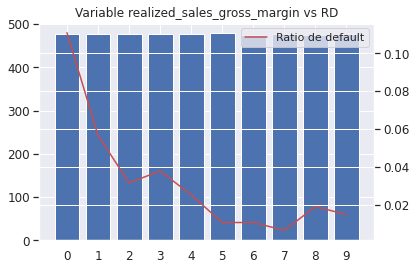

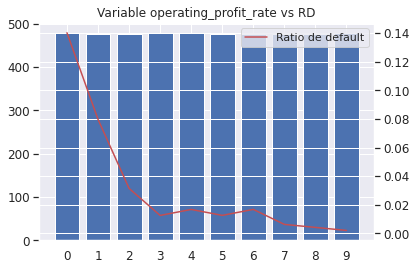

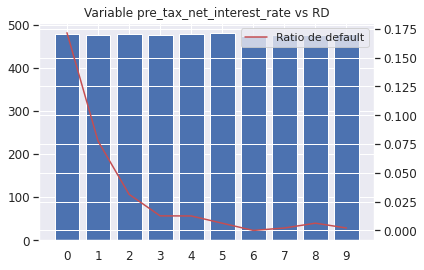

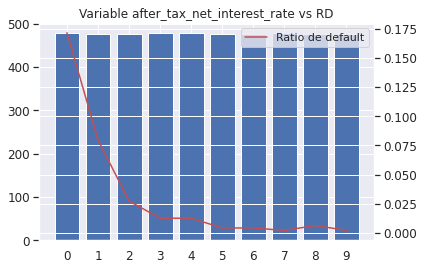

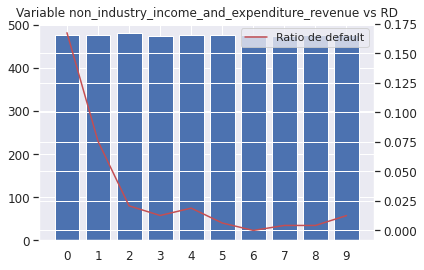

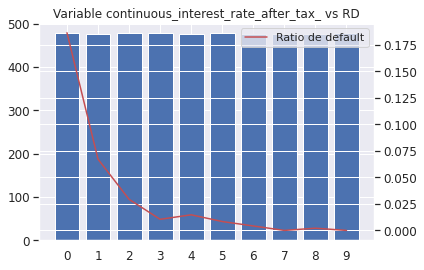

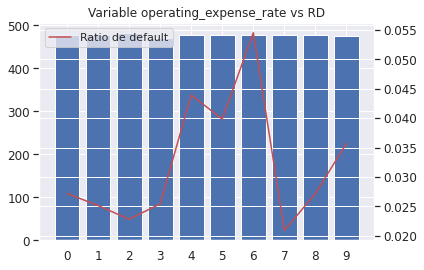

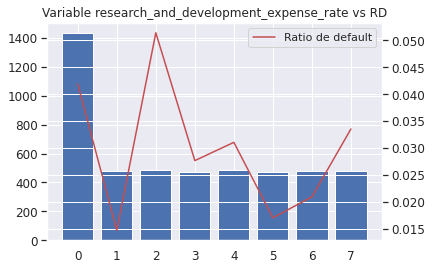

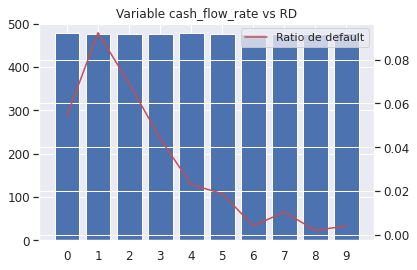

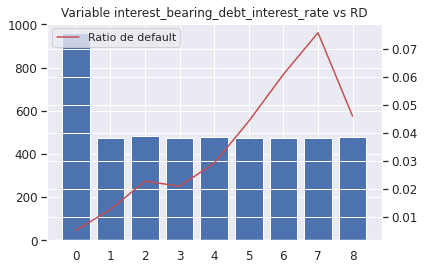

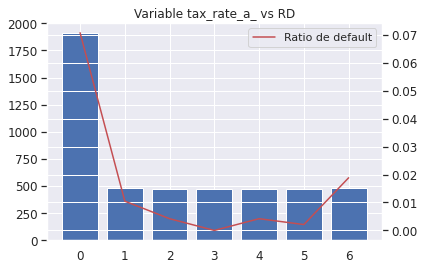

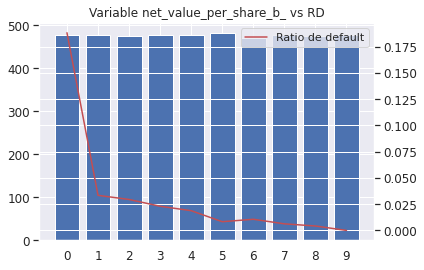

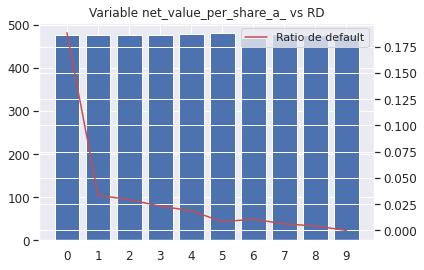

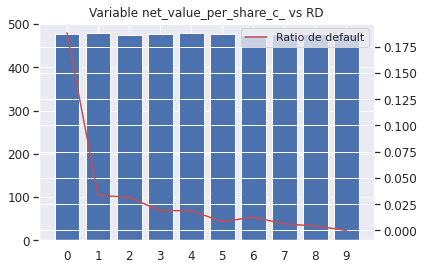

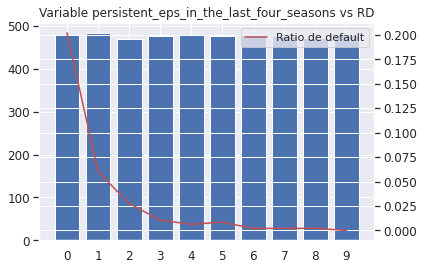

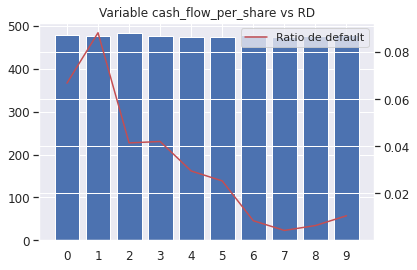

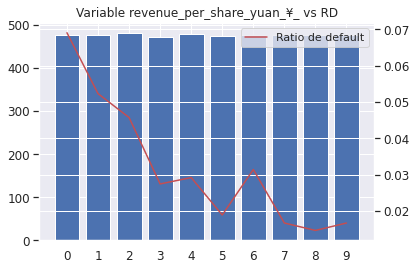

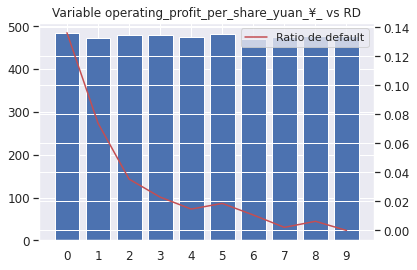

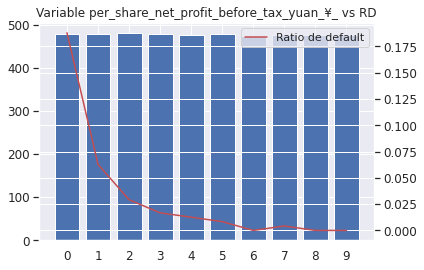

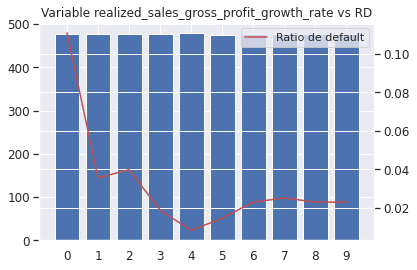

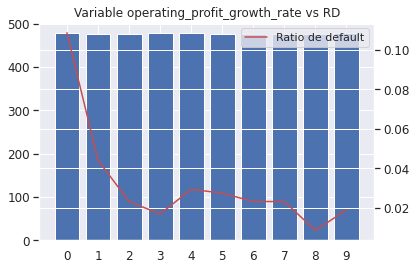

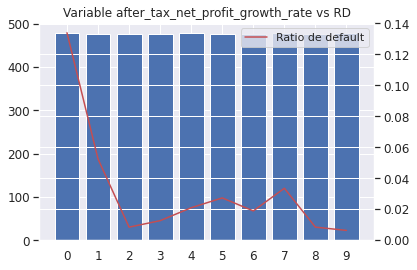

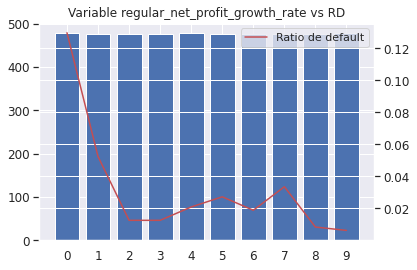

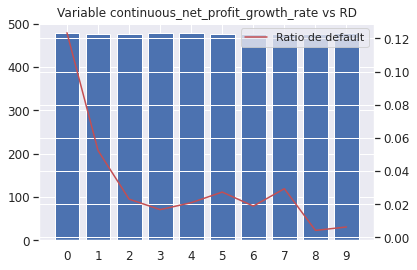

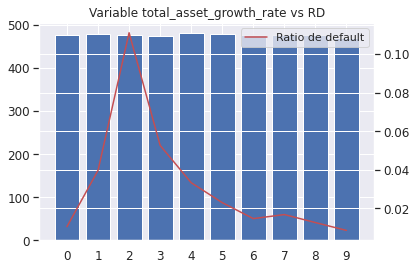

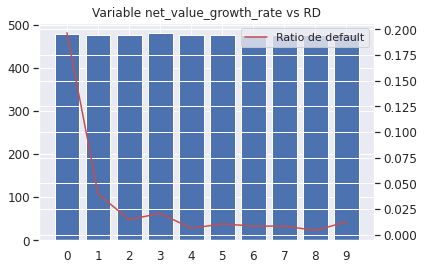

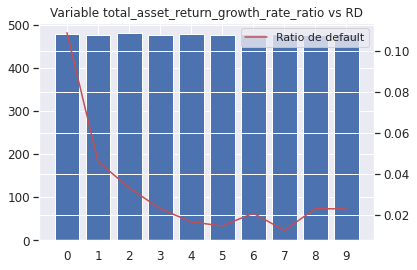

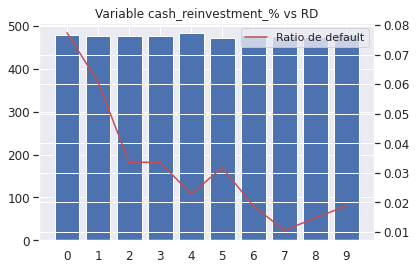

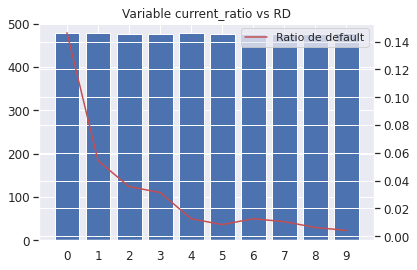

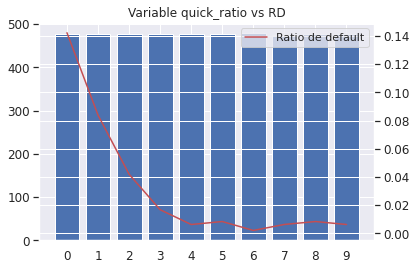

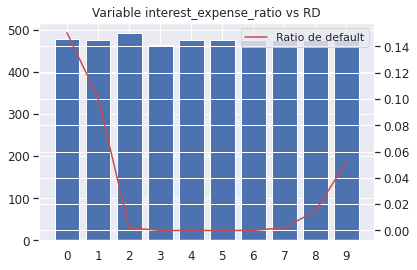

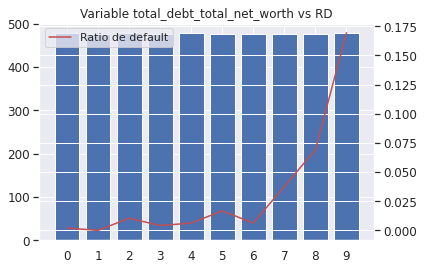

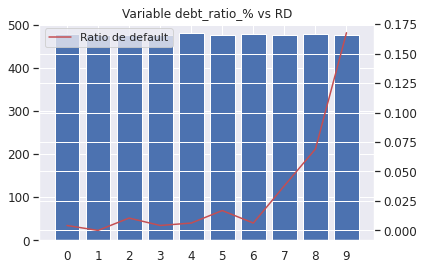

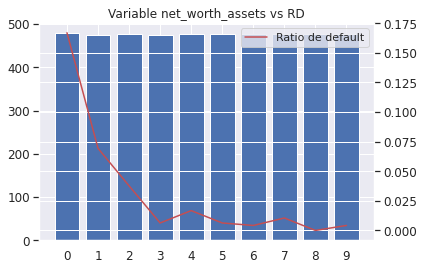

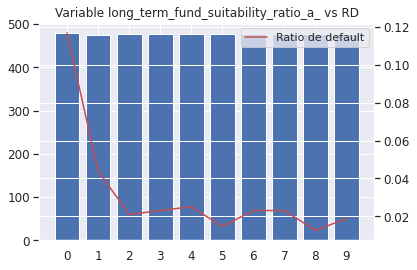

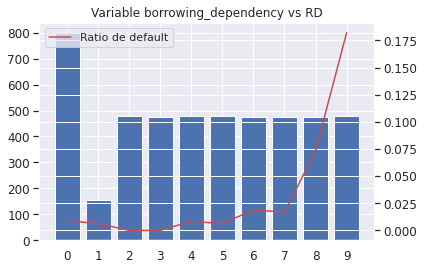

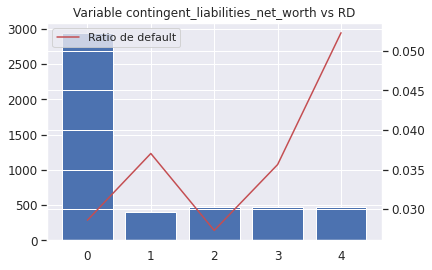

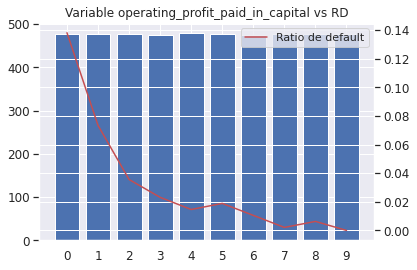

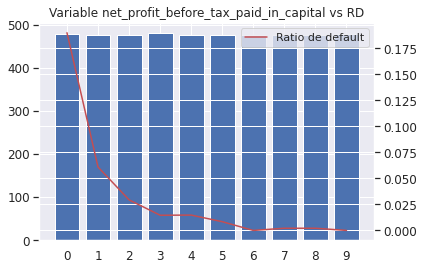

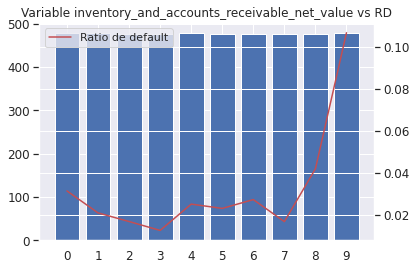

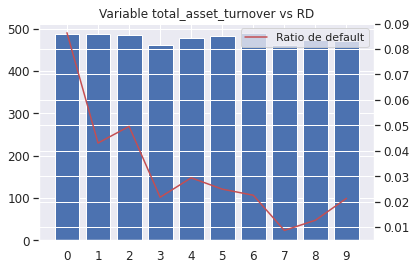

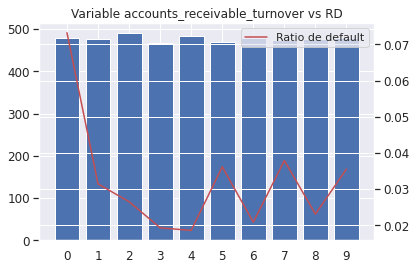

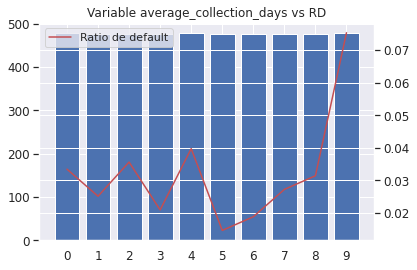

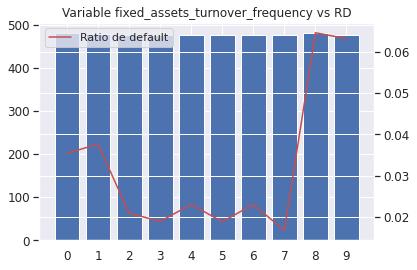

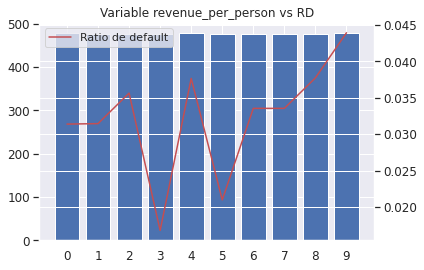

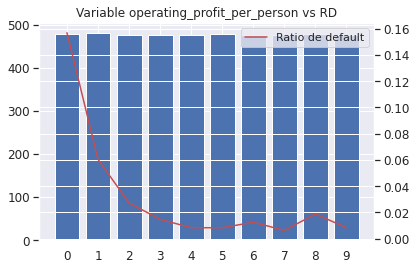

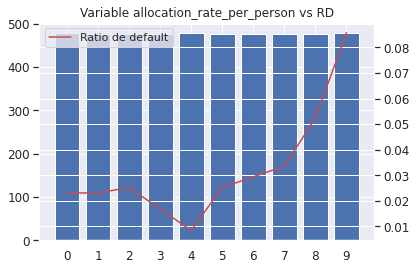

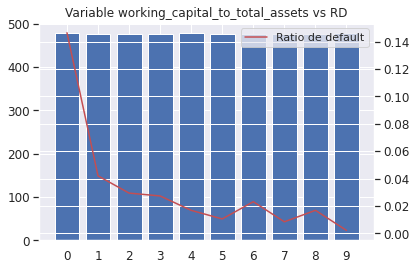

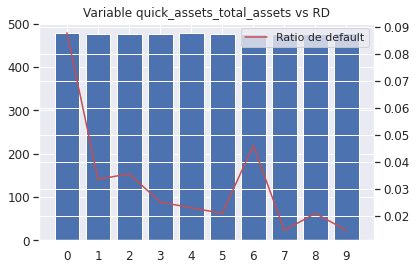

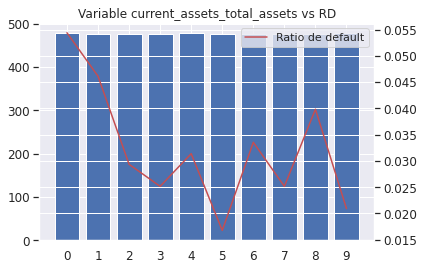

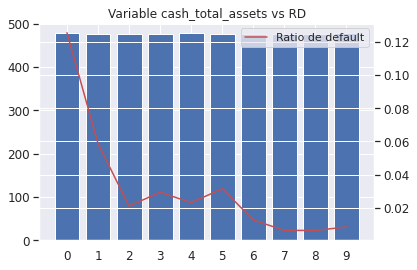

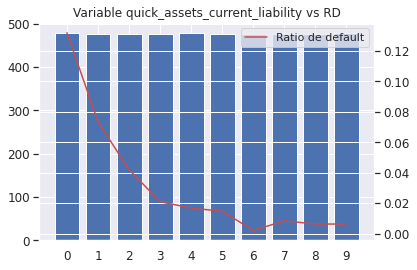

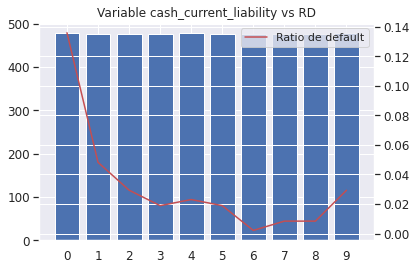

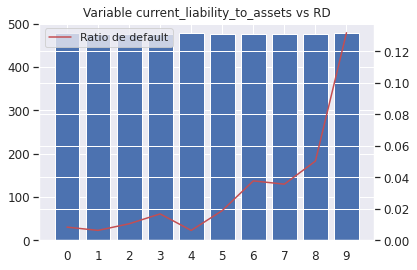

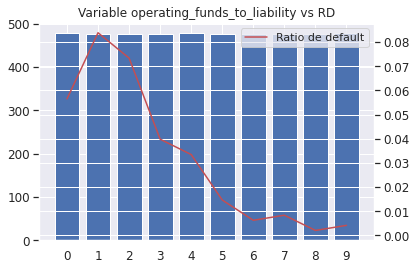

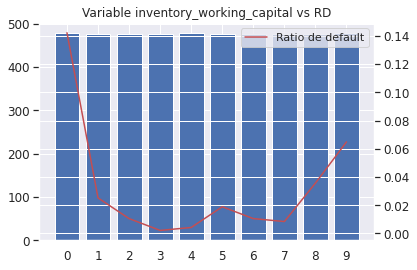

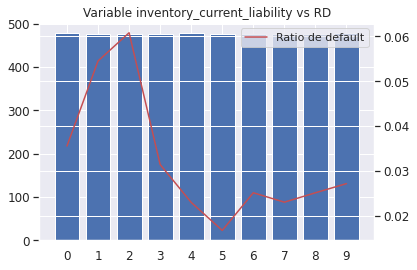

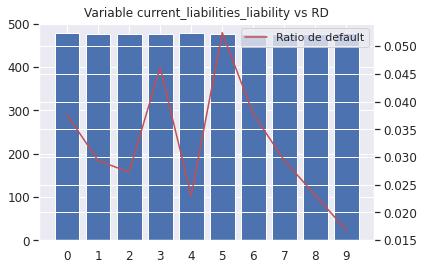

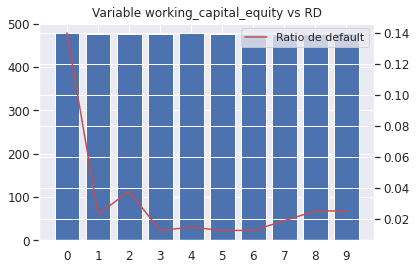

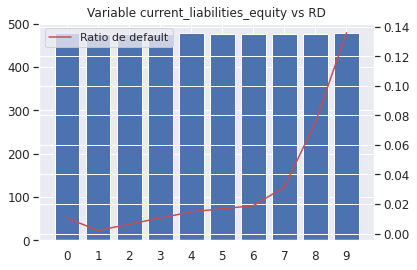

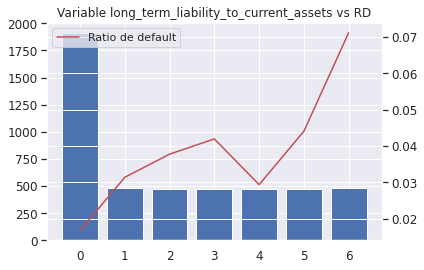

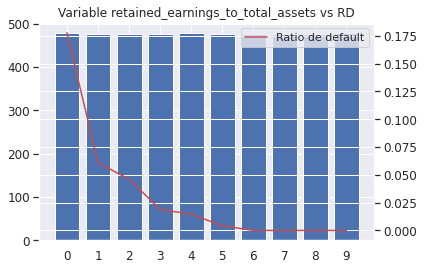

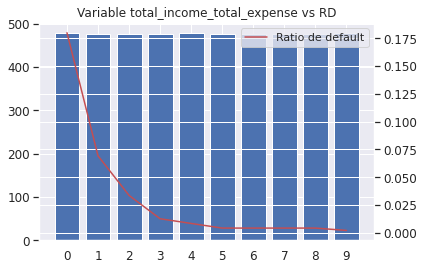

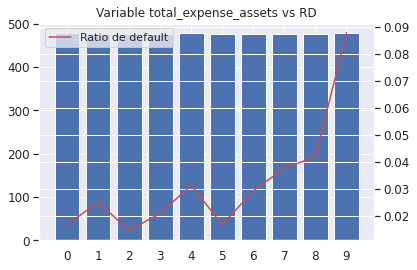

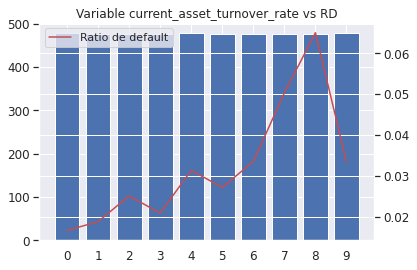

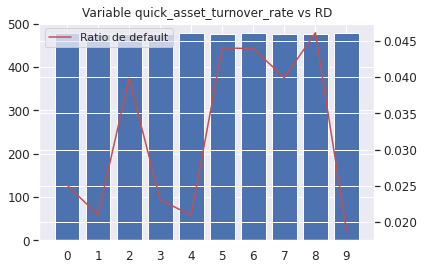

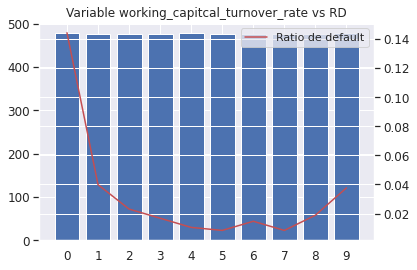

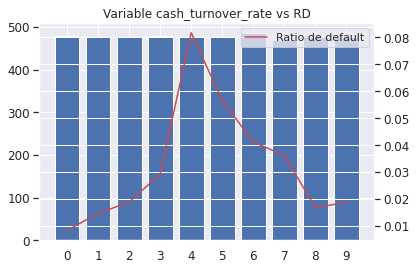

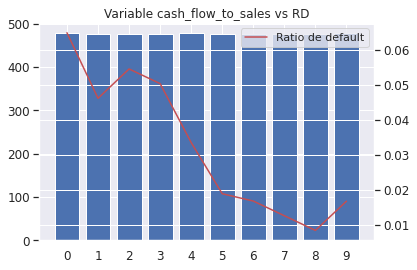

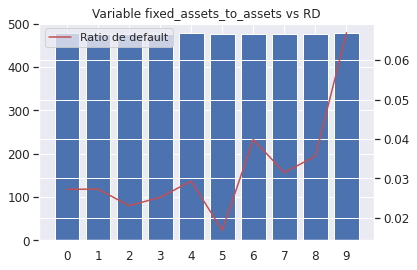

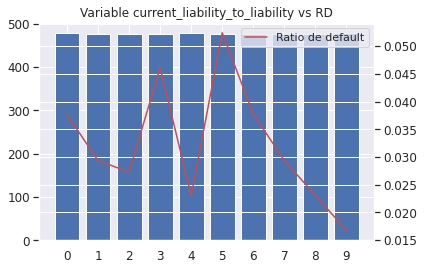

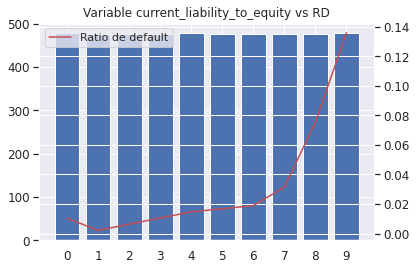

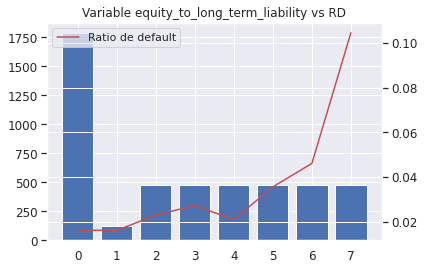

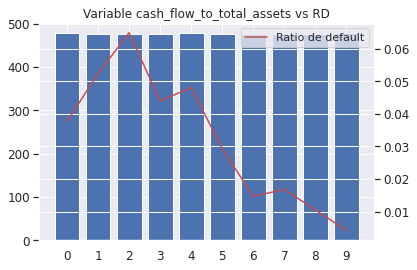

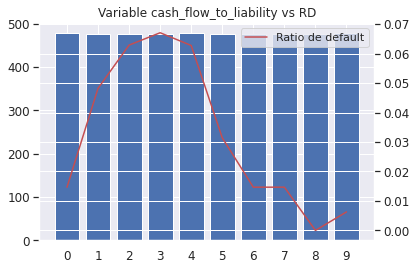

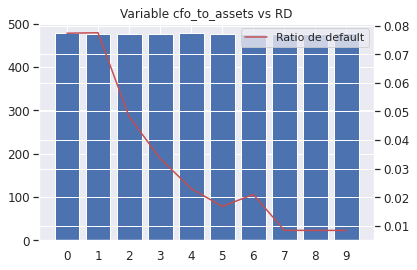

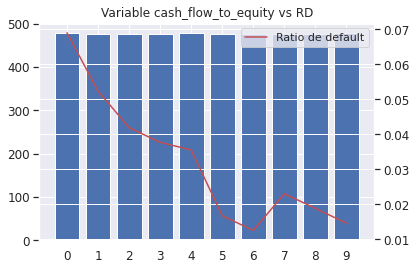

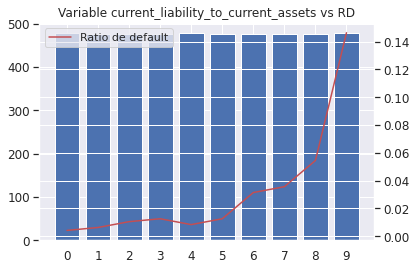

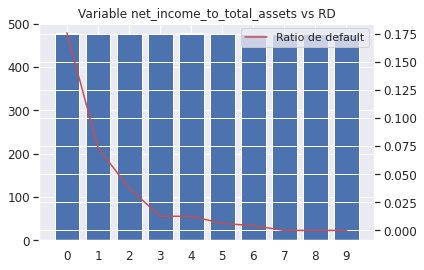

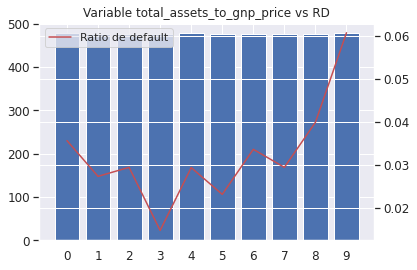

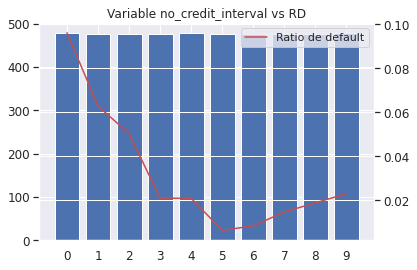

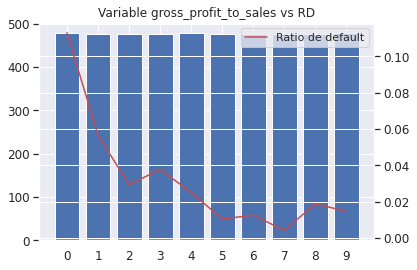

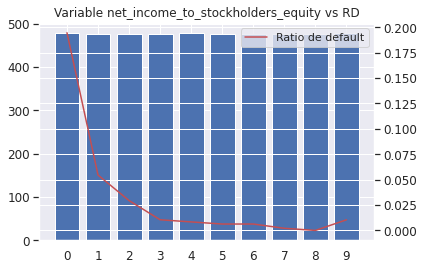

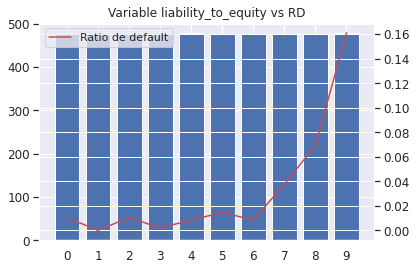

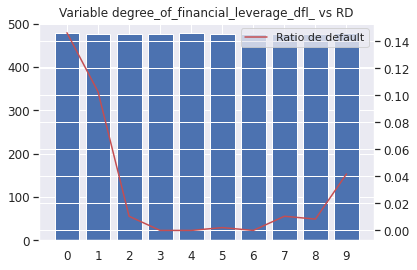

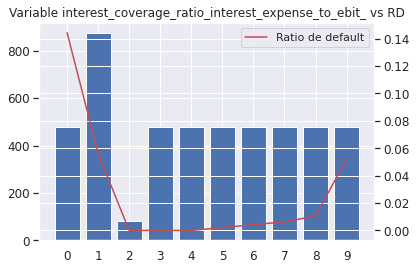

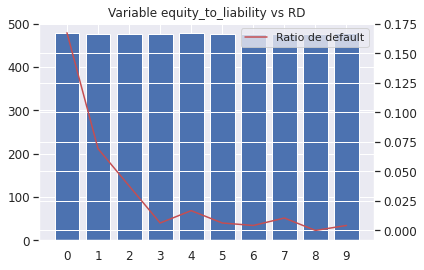

In [ ]:
target = 'bankrupt'

for i in numeric_features_post_univ:
  getGraficaBivariado_varNumericas(X_train[numeric_features_post_univ+['bankrupt']],i,target)

In [ ]:
# Excluyendo variables por sentido economico
drop_varsnum_byse = ['operating_expense_rate','research_and_development_expense_rate','contingent_liabilities_net_worth',
                     'fixed_assets_turnover_frequency','revenue_per_person','current_assets_total_assets','current_liabilities_liability',
                     'quick_asset_turnover_rate','cash_turnover_rate','total_assets_to_gnp_price']

In [ ]:
numeric_features_post_univ_se = [ x for x in numeric_features_post_univ if x not in drop_varsnum_byse]

In [ ]:
print ('Variables numericas post filtro univariado: ',len(numeric_features_post_univ))
print ('Variables numericas a eliminar por se : ',len(drop_varsnum_byse))
print ('Variables numericas post filtro univariado - se : ',len(numeric_features_post_univ_se))

Variables numericas post filtro univariado:  91
Variables numericas a eliminar por se :  10
Variables numericas post filtro univariado - se :  81


In [ ]:
dta_ginis = pd.read_csv("univariado_numericas_bankrupt.csv")

dta_ginis.sort_values(by='abs_giniMean', ascending=False).head(10)

feature   count      mean  \
18            persistent_eps_in_the_last_four_seasons  4773.0  0.228971   
42              net_profit_before_tax_paid_in_capital  4773.0  0.182753   
22            per_share_net_profit_before_tax_yuan_¥_  4773.0  0.184496   
85                         net_income_to_total_assets  4773.0  0.807738   
67                  retained_earnings_to_total_assets  4773.0  0.934481   
9                 continuous_interest_rate_after_tax_  4773.0  0.781448   
0   roa_c_before_interest_and_depreciation_before_...  4773.0  0.505382   
2    roa_b_before_interest_and_depreciation_after_tax  4773.0  0.553863   
1               roa_a_before_interest_and_%_after_tax  4773.0  0.558601   
68                         total_income_total_expense  4773.0  0.002609   

         std       min        Q1    Median        Q3       max  FillRate  \
18  0.034408  0.000000  0.214617  0.224544  0.239387  1.000000     100.0   
42  0.031791  0.000000  0.169339  0.178576  0.191660  1.000000     100.0   
22  0.034555  0.000000  0.170294  0.179785  0.193643  1.000000     100.0   
85  0.040525  0.000000  0.796713  0.810753  0.826719  0.981315     100.0   
67  0.027212  0.000000  0.930904  0.937707  0.944923  1.000000     100.0   
9   0.011865  0.000000  0.781566  0.781634  0.781737  1.000000     100.0   
0   0.061315  0.024277  0.476186  0.503632  0.536002  1.000000     100.0   
2   0.062240  0.033514  0.527384  0.552760  0.585256  1.000000     100.0   
1   0.066099  0.000000  0.535434  0.560183  0.590166  1.000000     100.0   
68  0.014447  0.001314  0.002235  0.002338  0.002498  1.000000     100.0   

    giniMean  giniMedian   giniNan  abs_giniMean  abs_giniMedian  abs_giniNan  \
18 -0.783651   -0.783651 -0.783651      0.783651        0.783651     0.783651   
42 -0.766154   -0.766154 -0.766154      0.766154        0.766154     0.766154   
22 -0.763939   -0.763939 -0.763939      0.763939        0.763939     0.763939   
85 -0.763636   -0.763636 -0.763636      0.763636        0.763636     0.763636   
67 -0.754127   -0.754127 -0.754127      0.754127        0.754127     0.754127   
9  -0.751378   -0.751378 -0.751378      0.751378        0.751378     0.751378   
0  -0.747112   -0.747112 -0.747112      0.747112        0.747112     0.747112   
2  -0.744611   -0.744611 -0.744611      0.744611        0.744611     0.744611   
1  -0.731981   -0.731981 -0.731981      0.731981        0.731981     0.731981   
68 -0.731150   -0.731150 -0.731150      0.731150        0.731150     0.731150   

    abs_ginimax  
18     0.783651  
42     0.766154  
22     0.763939  
85     0.763636  
67     0.754127  
9      0.751378  
0      0.747112  
2      0.744611  
1      0.731981  
68     0.731150

## 9. Preparando las bases de Train, Dev y Test

### Data Train

In [ ]:
X_train2 = pd.concat([X_train[['bankrupt']+numeric_features_post_univ_se].reset_index(drop=True),],axis=1)
X_train2.head()

bankrupt  roa_c_before_interest_and_depreciation_before_interest  \
0         0                                           0.504168        
1         0                                           0.373568        
2         0                                           0.486716        
3         0                                           0.473651        
4         0                                           0.544679        

   roa_a_before_interest_and_%_after_tax  \
0                               0.565198   
1                               0.398604   
2                               0.561982   
3                               0.550371   
4                               0.589730   

   roa_b_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                          0.548423                0.602185   
1                                          0.417099                0.583102   
2                                          0.536592                0.596420   
3                                          0.526688                0.599735   
4                                          0.588254                0.608628   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.602149               0.999017   
1                     0.583102               0.998582   
2                     0.596420               0.998984   
3                     0.599735               0.998951   
4                     0.608628               0.999053   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                   0.797460                     0.809362   
1                   0.796899                     0.808854   
2                   0.797421                     0.809340   
3                   0.797617                     0.809530   
4                   0.797633                     0.809508   

   non_industry_income_and_expenditure_revenue  ...  cash_flow_to_equity  \
0                                     0.303547  ...             0.310531   
1                                     0.303476  ...             0.315201   
2                                     0.303548  ...             0.312522   
3                                     0.303960  ...             0.343836   
4                                     0.303774  ...             0.314582   

   current_liability_to_current_assets  net_income_to_total_assets  \
0                             0.027599                    0.817546   
1                             0.016710                    0.705462   
2                             0.024910                    0.811528   
3                             0.029721                    0.803031   
4                             0.015355                    0.828977   

   no_credit_interval  gross_profit_to_sales  \
0            0.623952               0.602183   
1            0.623695               0.583099   
2            0.623647               0.596417   
3            0.623669               0.599735   
4            0.624224               0.608624   

   net_income_to_stockholders_equity  liability_to_equity  \
0                           0.841690             0.279071   
1                           0.834619             0.276702   
2                           0.842020             0.286373   
3                           0.840688             0.281243   
4                           0.841820             0.275834   

   degree_of_financial_leverage_dfl_  \
0                           0.026808   
1                           0.026783   
2                           0.026895   
3                           0.026794   
4                           0.026792   

   interest_coverage_ratio_interest_expense_to_ebit_  equity_to_liability  
0                                           0.565238             0.032285  
1                                           0.565121             0.058145  
2                                           0.565610             0.018511  
3                                           0.5

In [ ]:
X_train2.shape

(4773, 82)

### Data Dev

In [ ]:
X_watch2 = pd.concat([X_watch[['bankrupt']+numeric_features_post_univ_se].reset_index(drop=True),],axis=1)
X_watch2.head()

bankrupt  roa_c_before_interest_and_depreciation_before_interest  \
0         0                                           0.483596        
1         0                                           0.467167        
2         0                                           0.494174        
3         0                                           0.488178        
4         0                                           0.535563        

   roa_a_before_interest_and_%_after_tax  \
0                               0.551243   
1                               0.519080   
2                               0.558003   
3                               0.552769   
4                               0.586731   

   roa_b_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                          0.535628                0.624223   
1                                          0.514803                0.598128   
2                                          0.548316                0.626263   
3                                          0.540821                0.598185   
4                                          0.589860                0.607720   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.622732               0.999014   
1                     0.599410               0.998961   
2                     0.626263               0.999110   
3                     0.598185               0.998967   
4                     0.607720               0.999090   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                   0.797511                     0.809431   
1                   0.797265                     0.809193   
2                   0.797489                     0.809405   
3                   0.797401                     0.809325   
4                   0.797527                     0.809434   

   non_industry_income_and_expenditure_revenue  ...  cash_flow_to_equity  \
0                                     0.303643  ...             0.315638   
1                                     0.303325  ...             0.308981   
2                                     0.303403  ...             0.320365   
3                                     0.303550  ...             0.329332   
4                                     0.303512  ...             0.313372   

   current_liability_to_current_assets  net_income_to_total_assets  \
0                             0.016781                    0.807443   
1                             0.031922                    0.788200   
2                             0.038582                    0.808840   
3                             0.021356                    0.808462   
4                             0.028272                    0.826740   

   no_credit_interval  gross_profit_to_sales  \
0            0.623936               0.624223   
1            0.623627               0.598126   
2            0.623723               0.626261   
3            0.623931               0.598181   
4            0.624356               0.607721   

   net_income_to_stockholders_equity  liability_to_equity  \
0                           0.840767             0.277176   
1                           0.839538             0.277413   
2                           0.841145             0.280420   
3                           0.841060             0.279805   
4                           0.842277             0.278537   

   degree_of_financial_leverage_dfl_  \
0                           0.026820   
1                           0.026621   
2                           0.027028   
3                           0.026939   
4                           0.026826   

   interest_coverage_ratio_interest_expense_to_ebit_  equity_to_liability  
0                                           0.565291             0.049042  
1                                           0.564191             0.045665  
2                                           0.566081             0.027101  
3                                           0.5

In [ ]:
X_watch2.shape

(1023, 82)

### Data Test

In [ ]:
X_test2 = pd.concat([X_test[['bankrupt']+numeric_features_post_univ_se].reset_index(drop=True),],axis=1)
X_test2.head()

bankrupt  roa_c_before_interest_and_depreciation_before_interest  \
0         0                                           0.497441        
1         0                                           0.780139        
2         0                                           0.498952        
3         0                                           0.480086        
4         0                                           0.395652        

   roa_a_before_interest_and_%_after_tax  \
0                               0.559038   
1                               0.875600   
2                               0.562091   
3                               0.542030   
4                               0.463694   

   roa_b_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                          0.551475                0.598733   
1                                          0.869158                0.640071   
2                                          0.548584                0.598329   
3                                          0.534076                0.602625   
4                                          0.450988                0.594373   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.598733               0.999007   
1                     0.640071               0.999592   
2                     0.598344               0.998996   
3                     0.602625               0.998933   
4                     0.594373               0.998881   

   pre_tax_net_interest_rate  after_tax_net_interest_rate  \
0                   0.797541                     0.809449   
1                   0.798052                     0.809950   
2                   0.797419                     0.809340   
3                   0.797412                     0.809337   
4                   0.797073                     0.809053   

   non_industry_income_and_expenditure_revenue  ...  cash_flow_to_equity  \
0                                     0.303711  ...             0.316786   
1                                     0.303379  ...             0.320561   
2                                     0.303520  ...             0.312180   
3                                     0.303639  ...             0.314742   
4                                     0.303156  ...             0.317271   

   current_liability_to_current_assets  net_income_to_total_assets  \
0                             0.033945                    0.810364   
1                             0.021280                    0.934402   
2                             0.026771                    0.810369   
3                             0.024630                    0.801686   
4                             0.050576                    0.754064   

   no_credit_interval  gross_profit_to_sales  \
0            0.624744               0.598734   
1            0.624280               0.640069   
2            0.624386               0.598328   
3            0.623992               0.602623   
4            0.623639               0.594372   

   net_income_to_stockholders_equity  liability_to_equity  \
0                           0.841254             0.280202   
1                           0.849953             0.278385   
2                           0.841281             0.280461   
3                           0.840429             0.277838   
4                           0.836553             0.280066   

   degree_of_financial_leverage_dfl_  \
0                           0.026922   
1                           0.026792   
2                           0.027011   
3                           0.026938   
4                           0.026720   

   interest_coverage_ratio_interest_expense_to_ebit_  equity_to_liability  
0                                           0.565712             0.027767  
1                                           0.565164             0.036371  
2                                           0.566027             0.026981  
3                                           0.5

In [ ]:
X_test2.shape

(1023, 82)

## 10. Modelo base - XGBOOST

In [ ]:
X_train_base = X_train2.drop(vars_info,axis=1)
X_dev_base   = X_watch2.drop(vars_info,axis=1)
X_test_base  = X_test2.drop(vars_info,axis=1)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(n_estimators = 3000,
                          seed = 20221230,
                          nthread = 6,
                          objective = 'binary:logistic',
                          eval_metric = 'logloss',
                          learning_rate = 0.3,
                          max_depth = 6,
                          gamma = 3,
                          reg_alpha = 3,
                          reg_lambda = 3,
                          subsample = 1,
                          colsample_bytree = 1)
xgb_model.fit(X_train_base,y_train,eval_set=[(X_dev_base,y_watch)],early_stopping_rounds=10)

[0]	validation_0-logloss:0.463321
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.337501
[2]	validation_0-logloss:0.259246
[3]	validation_0-logloss:0.206944
[4]	validation_0-logloss:0.171767
[5]	validation_0-logloss:0.145974
[6]	validation_0-logloss:0.128076
[7]	validation_0-logloss:0.11567
[8]	validation_0-logloss:0.106494
[9]	validation_0-logloss:0.099025
[10]	validation_0-logloss:0.094005
[11]	validation_0-logloss:0.09091
[12]	validation_0-logloss:0.089286
[13]	validation_0-logloss:0.087334
[14]	validation_0-logloss:0.08657
[15]	validation_0-logloss:0.085367
[16]	validation_0-logloss:0.085298
[17]	validation_0-logloss:0.084896
[18]	validation_0-logloss:0.084084
[19]	validation_0-logloss:0.084145
[20]	validation_0-logloss:0.08396
[21]	validation_0-logloss:0.084099
[22]	validation_0-logloss:0.084103
[23]	validation_0-logloss:0.084107
[24]	validation_0-logloss:0.084109
[25]	validation_0-logloss:0.084111
[26]	validation_0-logloss:0.084112
[

XGBClassifier(eval_metric='logloss', gamma=3, learning_rate=0.3, max_depth=6,
              n_estimators=3000, nthread=6, reg_alpha=3, reg_lambda=3,
              seed=20221230)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_proba = xgb_model.predict_proba(X_train_base)
auc = roc_auc_score(y_train,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.9728872556324386


In [ ]:
y_pred_proba = xgb_model.predict_proba(X_dev_base)
auc = roc_auc_score(y_watch,y_pred_proba[:,1])

print('Gini Dev: ',2*auc-1)

Gini Dev:  0.8708907254361797


In [ ]:
y_pred_proba = xgb_model.predict_proba(X_test_base)
auc = roc_auc_score(y_test,y_pred_proba[:,1])

print('Gini Test: ',2*auc-1)

Gini Test:  0.9258034894398532


In [ ]:
importances = pd.DataFrame(data={'Variable':X_train_base.columns,
                                 'Gain': xgb_model.feature_importances_})

importances = importances.sort_values(by='Gain',ascending=False)
importances.to_csv('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/featureImportance_xgboost1_bakrupt.csv',index=False)

In [ ]:
# Eliminando variables no significativas para el modelo
features_post_modelbase = importances[importances['Gain']>0]['Variable'].to_list()

## 11. Analisis multivariado

In [ ]:
# Para este analisis, se agruparan a las variables por familias de correlacion
# donde por cada una de estas se quedará con la variable que posea mayor Gain / Gini

In [ ]:
df_corr = X_train_base[features_post_modelbase].corr()
df_corr.to_excel('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/Correlaciones_bankrupt.xlsx')

In [ ]:
drop_varsnum_bycorr = ['net_value_per_share_b_','roa_c_before_interest_and_depreciation_before_interest','net_income_to_total_assets',
                       'roa_b_before_interest_and_depreciation_after_tax','borrowing_dependency','liability_to_equity','equity_to_long_term_liability',
                       'cash_flow_to_sales','operating_profit_rate','cash_flow_to_liability']

In [ ]:
features_post_modelbase_corr = [x for x in features_post_modelbase if x not in drop_varsnum_bycorr]

In [ ]:
print(' Nro variables post modelo base: ',len(features_post_modelbase))
print(' Nro variables a eliminar por correlaciones: ',len(drop_varsnum_bycorr))
print(' Nro variables post correlaciones: ',len(features_post_modelbase_corr))

 Nro variables post modelo base:  49
 Nro variables a eliminar por correlaciones:  10
 Nro variables post correlaciones:  39


## 12. Modelo XGBOOST

In [ ]:
X_train3 = X_train2[features_post_modelbase_corr]
X_dev3   = X_watch2[features_post_modelbase_corr]
X_test3  = X_test2[features_post_modelbase_corr]

In [ ]:
xgb_model = XGBClassifier(n_estimators = 3000,
                          seed = 20221230,
                          nthread = 6,
                          objective = 'binary:logistic',
                          eval_metric = 'logloss',
                          learning_rate = 0.3,
                          max_depth = 6,
                          gamma = 3,
                          reg_alpha = 3,
                          reg_lambda = 3,
                          subsample = 1,
                          colsample_bytree = 1)
xgb_model.fit(X_train3,y_train,eval_set=[(X_dev3,y_watch)],early_stopping_rounds=10)

[0]	validation_0-logloss:0.465832
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.34128
[2]	validation_0-logloss:0.263556
[3]	validation_0-logloss:0.211608
[4]	validation_0-logloss:0.176967
[5]	validation_0-logloss:0.152943
[6]	validation_0-logloss:0.134394
[7]	validation_0-logloss:0.121487
[8]	validation_0-logloss:0.112644
[9]	validation_0-logloss:0.106367
[10]	validation_0-logloss:0.101024
[11]	validation_0-logloss:0.0974
[12]	validation_0-logloss:0.095232
[13]	validation_0-logloss:0.093221
[14]	validation_0-logloss:0.091883
[15]	validation_0-logloss:0.090994
[16]	validation_0-logloss:0.090856
[17]	validation_0-logloss:0.090671
[18]	validation_0-logloss:0.089568
[19]	validation_0-logloss:0.088435
[20]	validation_0-logloss:0.087996
[21]	validation_0-logloss:0.087513
[22]	validation_0-logloss:0.087591
[23]	validation_0-logloss:0.08777
[24]	validation_0-logloss:0.087776
[25]	validation_0-logloss:0.08778
[26]	validation_0-logloss:0.087782
[2

XGBClassifier(eval_metric='logloss', gamma=3, learning_rate=0.3, max_depth=6,
              n_estimators=3000, nthread=6, reg_alpha=3, reg_lambda=3,
              seed=20221230)

In [ ]:
y_pred_proba = xgb_model.predict_proba(X_train3)
auc = roc_auc_score(y_train,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.9733033798848911


In [ ]:
y_pred_proba = xgb_model.predict_proba(X_dev3)
auc = roc_auc_score(y_watch,y_pred_proba[:,1])

print('Gini Dev: ',2*auc-1)

Gini Dev:  0.8694214876033057


In [ ]:
y_pred_proba = xgb_model.predict_proba(X_test3)
auc = roc_auc_score(y_test,y_pred_proba[:,1])

print('Gini Test: ',2*auc-1)

Gini Test:  0.9261095806550352


In [ ]:
importances = pd.DataFrame(data={'Variable':X_train3.columns,
                                 'Gain': xgb_model.feature_importances_})

importances = importances.sort_values(by='Gain',ascending=False)
importances.to_csv('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/featureImportance_xgboost2.csv',index=False)

In [ ]:
drop_varsmodel02 = ['after_tax_net_interest_rate','realized_sales_gross_profit_growth_rate']

In [ ]:
features_post_modelbase2 = [x for x in features_post_modelbase_corr if x not in drop_varsmodel02]

In [ ]:
print(' Nro variables post modelo base2: ',len(features_post_modelbase_corr))
print(' Nro variables a eliminar por ser no significativas para el modelo: ',len(drop_varsmodel02))
print(' Nro variables finales: ',len(features_post_modelbase2))

 Nro variables post modelo base2:  39
 Nro variables a eliminar por ser no significativas para el modelo:  2
 Nro variables finales:  37


## 13. SHAPS

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.2 MB/s eta 0:00:00


In [ ]:
import shap

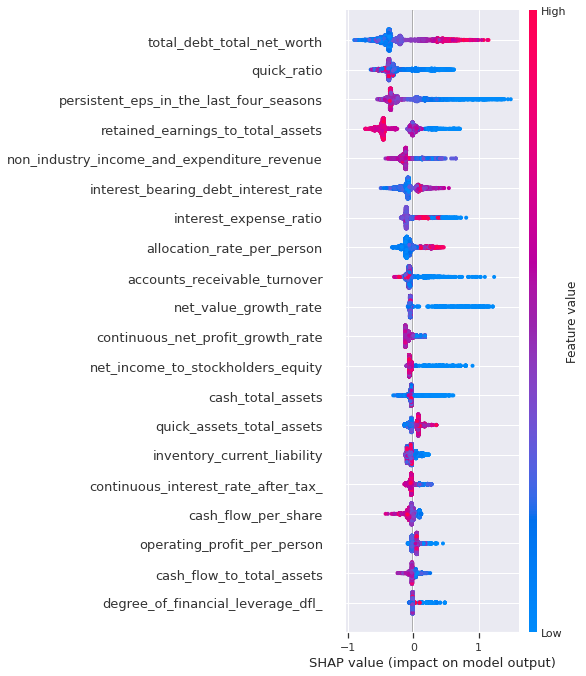

In [ ]:
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train3)
shap.summary_plot(shap_values,X_train3.values,feature_names=X_train3.columns)

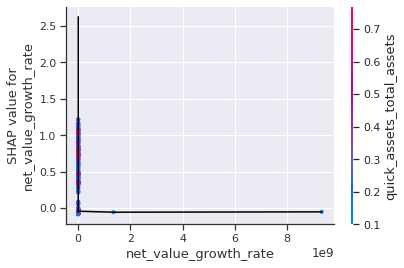

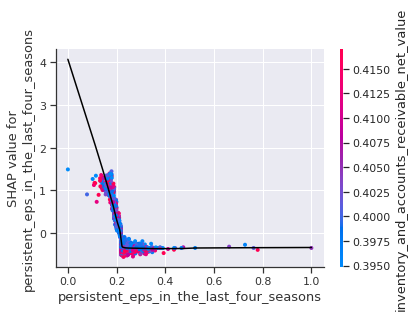

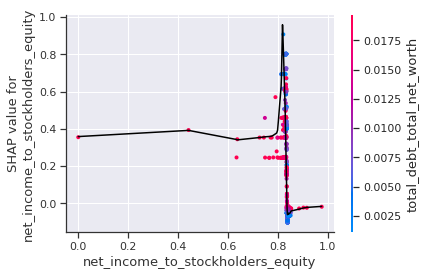

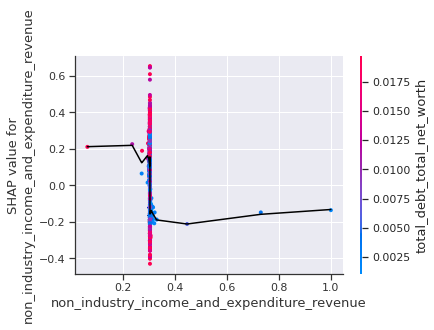

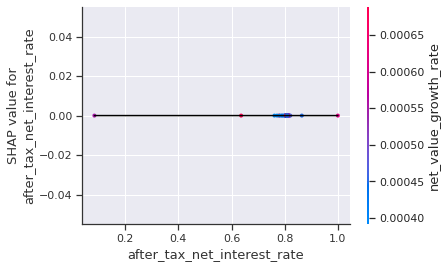

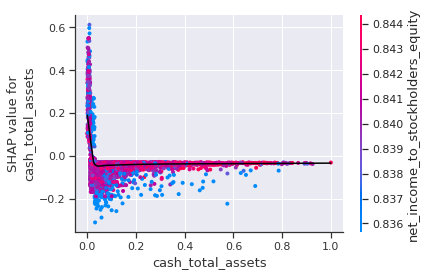

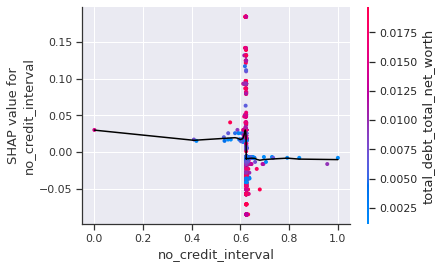

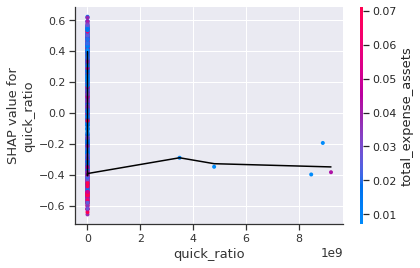

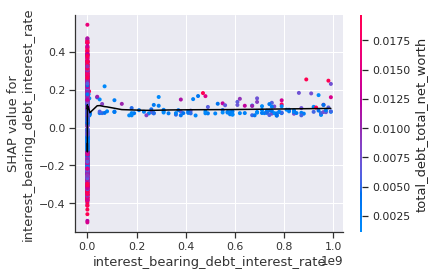

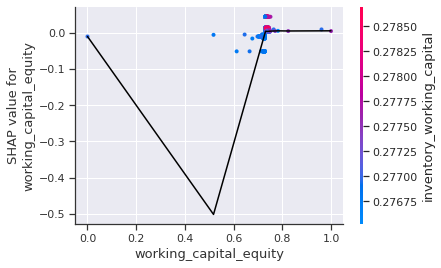

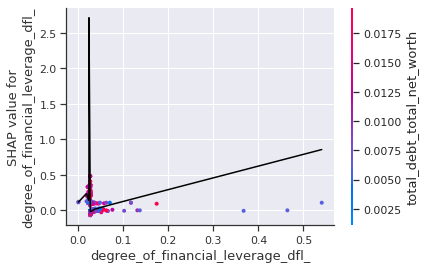

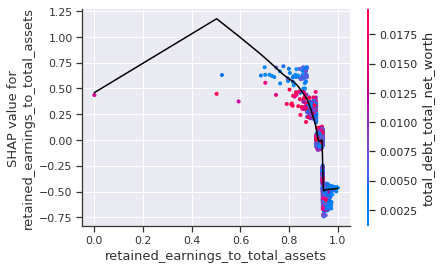

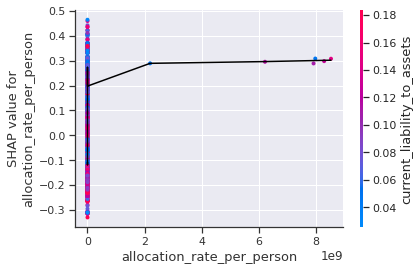

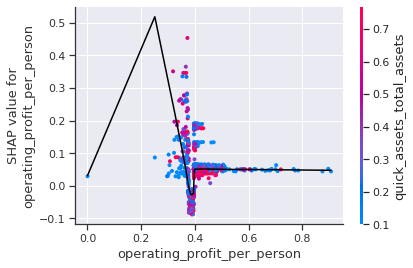

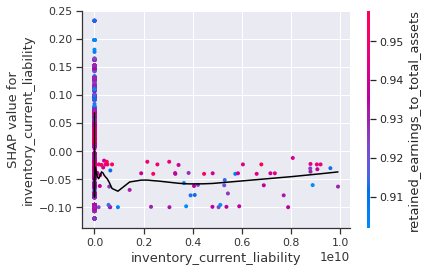

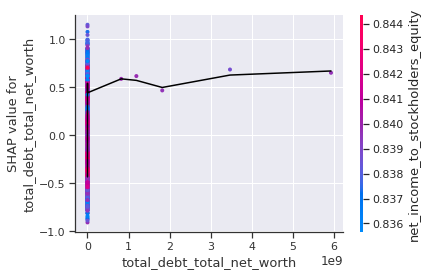

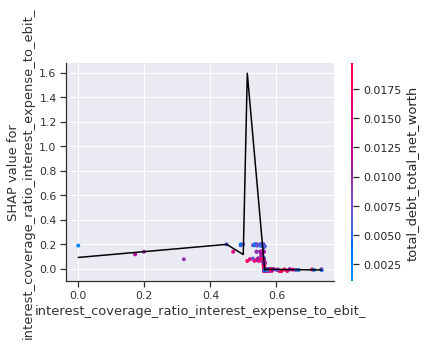

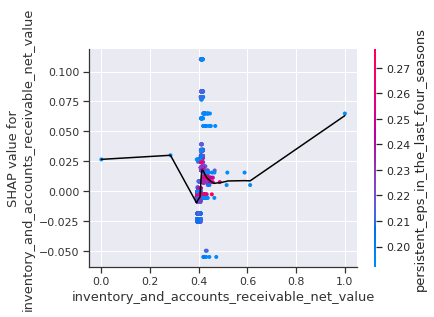

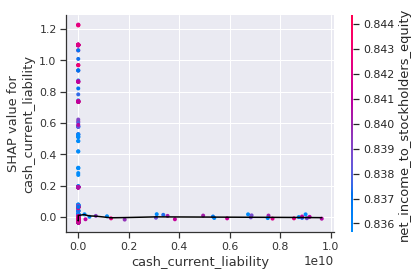

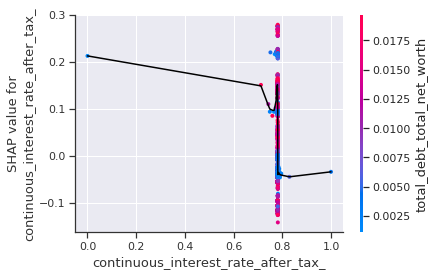

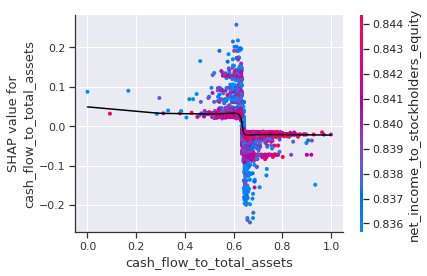

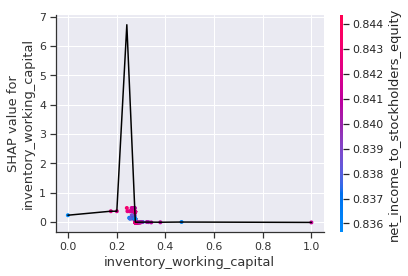

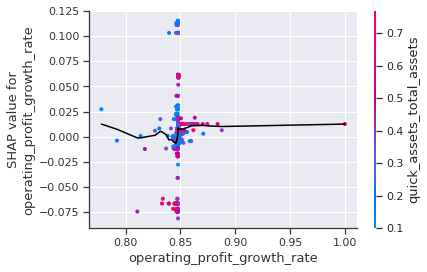

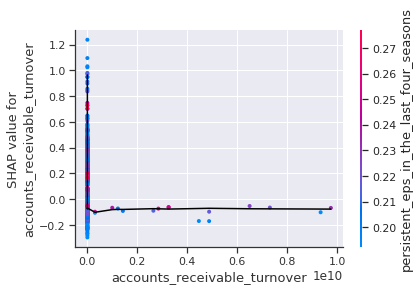

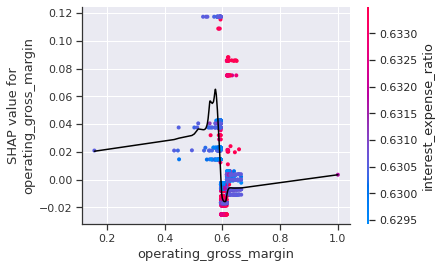

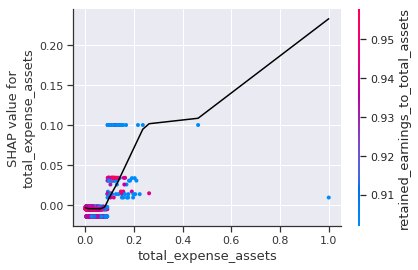

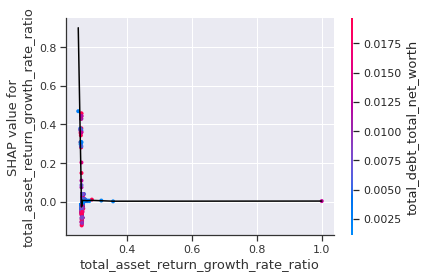

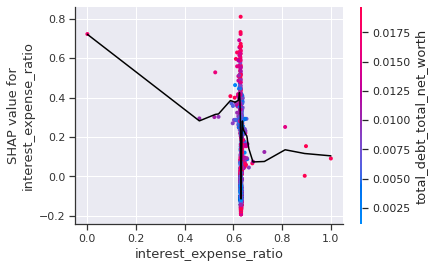

invalid value encountered in true_divide


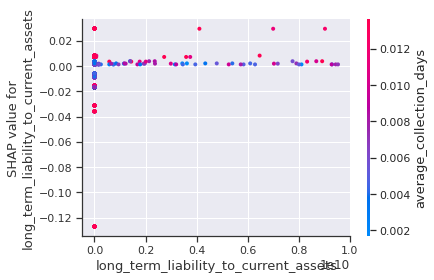

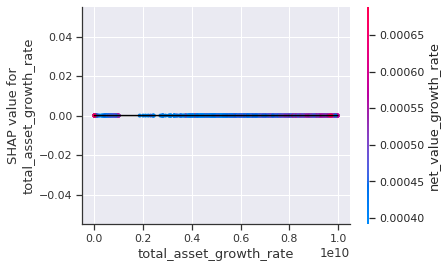

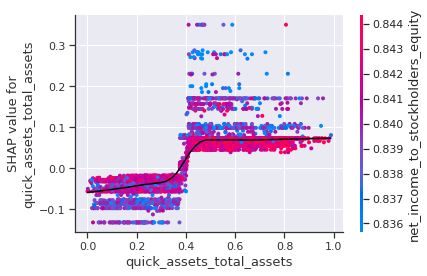

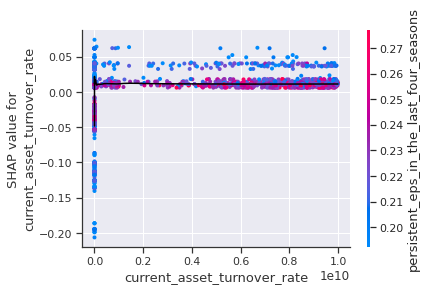

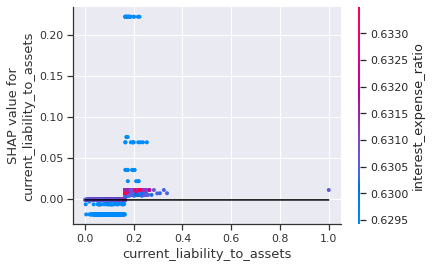

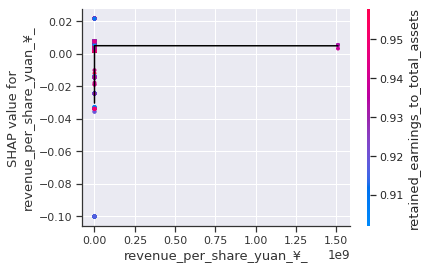

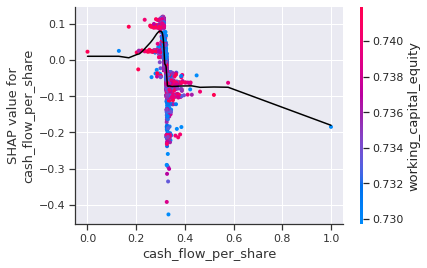

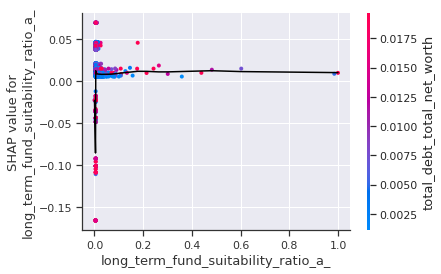

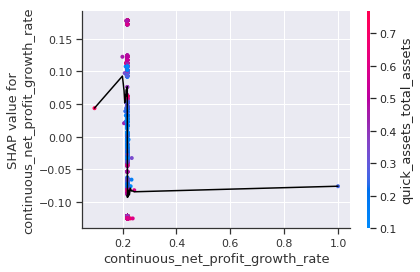

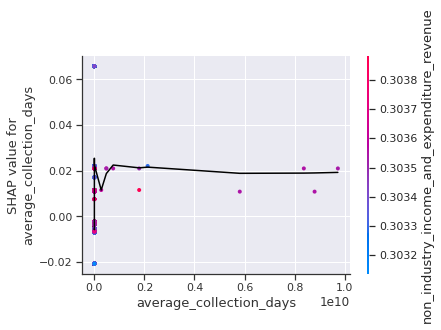

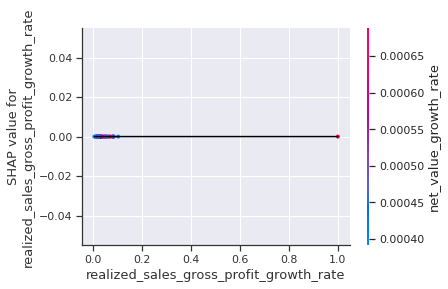

In [ ]:
import statsmodels.api as sm

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train3)
list_vars_finales = list(X_train3.columns)

for var in list_vars_finales:
  idx = np.where(X_train3.columns==var)[0][0]
  x = X_train3.iloc[:,idx]
  y_sv = shap_values[:,idx]
  lowess = sm.nonparametric.lowess(y_sv,x,frac=.3)

  _,ax = plt.subplots()
  ax.plot(*list(zip(*lowess)),color='black')
  shap.dependence_plot(var,shap_values,X_train3,ax=ax)

## 14. Optimizacion hiperparametros

In [ ]:
paramGrid = {'objective':['binary:logistic'],
              'max_depth':[3,4,5,6,7,8,9],
             'learning_rate':[0.018,0.032,0.056,0.01,0.02,0.05,0.08,0.1,0.15,0.5,0.8],
             'seed': [20221230],
             'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
             'colsample_bytree':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
             'reg_alpha':[1,2,3,4,5,10,15,20,35],
             'reg_lambda':[1,2,3,4,5,6,7,8],
             'gamma':[1,2,3,4,5,6,7,8]}

In [ ]:
'''
import random
import time

start_time = time.time()
pdResults = pd.DataFrame()

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}

  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)

  param['eval_metric' ] = 'logloss'
  n_rounds = 3000

  xgb_model = XGBClassifier(objective = param['objective'],
                            max_depth = param['max_depth'],
                            learning_rate = param['learning_rate'],
                            seed = param['seed'],
                            subsample = param['subsample'],
                            colsample_bytree = param['colsample_bytree'],
                            gamma = param['gamma'],
                            reg_lambda = param['reg_lambda'],
                            reg_alpha = param['reg_alpha'],
                            eval_metric = param['eval_metric'],
                            n_estimators = n_rounds)
  xgb_model.fit(X_train3,y_train,eval_set=[(X_dev3,y_watch)],early_stopping_rounds = 30)
  best_tree = xgb_model.get_booster().best_ntree_limit
  param['best_tree'] = best_tree

  y_train_pred = xgb_model.predict_proba(X_train3)
  y_dev_pred = xgb_model.predict_proba(X_dev3)
  y_test_pred = xgb_model.predict_proba(X_test3)

  giniTrain = (roc_auc_score(y_train,y_train_pred[:,1]))*2-1
  giniDev = (roc_auc_score(y_watch,y_dev_pred[:,1]))*2-1
  giniTest = (roc_auc_score(y_test,y_test_pred[:,1]))*2-1

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniDev' : giniDev,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/HyperParamSearch_xgboost.csv', index = False)

print('....%s seconds ---' %   ((time.time() - start_time)))
'''

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[221]	validation_0-logloss:0.134374
[222]	validation_0-logloss:0.133936
[223]	validation_0-logloss:0.133498
[224]	validation_0-logloss:0.13306
[225]	validation_0-logloss:0.132608
[226]	validation_0-logloss:0.132151
[227]	validation_0-logloss:0.131675
[228]	validation_0-logloss:0.131223
[229]	validation_0-logloss:0.13081
[230]	validation_0-logloss:0.13036
[231]	validation_0-logloss:0.129945
[232]	validation_0-logloss:0.129473
[233]	validation_0-logloss:0.129039
[234]	validation_0-logloss:0.12862
[235]	validation_0-logloss:0.128187
[236]	validation_0-logloss:0.127789
[237]	validation_0-logloss:0.127391
[238]	validation_0-logloss:0.126997
[239]	validation_0-logloss:0.126565
[240]	validation_0-logloss:0.126179
[241]	validation_0-logloss:0.125773
[242]	validation_0-logloss:0.125421
[243]	validation_0-logloss:0.125032
[244]	validation_0-logloss:0.124671
[245]	validation_0-logloss:0.124328
[246]	validation_0-logloss:0.123986
[

## 15. Modelo XGBoost final

In [ ]:
xgb_model_final = XGBClassifier(n_estimators = 15,
                          seed = 20221230,
                          objective = 'binary:logistic',
                          eval_metric = 'logloss',
                          learning_rate = 0.5,
                          max_depth = 6,
                          gamma = 5,
                          reg_alpha = 3,
                          reg_lambda = 3,
                          subsample = 0.5,
                          colsample_bytree = 0.6)
xgb_model_final.fit(X_train3,y_train,eval_set=[(X_dev3,y_watch)],early_stopping_rounds=30)

[0]	validation_0-logloss:0.357874
Will train until validation_0-logloss hasn't improved in 30 rounds.
[1]	validation_0-logloss:0.23412
[2]	validation_0-logloss:0.172617
[3]	validation_0-logloss:0.138913
[4]	validation_0-logloss:0.118583
[5]	validation_0-logloss:0.109223
[6]	validation_0-logloss:0.100302
[7]	validation_0-logloss:0.09623
[8]	validation_0-logloss:0.094736
[9]	validation_0-logloss:0.092221
[10]	validation_0-logloss:0.091144
[11]	validation_0-logloss:0.091144
[12]	validation_0-logloss:0.091144
[13]	validation_0-logloss:0.091185
[14]	validation_0-logloss:0.090128


XGBClassifier(colsample_bytree=0.6, eval_metric='logloss', gamma=5,
              learning_rate=0.5, max_depth=6, n_estimators=15, reg_alpha=3,
              reg_lambda=3, seed=20221230, subsample=0.5)

In [ ]:
y_pred_proba = xgb_model_final.predict_proba(X_train3)
auc = roc_auc_score(y_train,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.9162774873967774


In [ ]:
y_pred_proba = xgb_model_final.predict_proba(X_dev3)
auc = roc_auc_score(y_watch,y_pred_proba[:,1])

print('Gini Dev: ',2*auc-1)

Gini Dev:  0.8504438322620143


In [ ]:
y_pred_proba = xgb_model_final.predict_proba(X_test3)
auc = roc_auc_score(y_test,y_pred_proba[:,1])

print('Gini Test: ',2*auc-1)

Gini Test:  0.8818487909397001


In [ ]:
importances = pd.DataFrame(data={'Variable':X_train3.columns,
                                 'Gain': xgb_model_final.feature_importances_})

importances = importances.sort_values(by='Gain',ascending=False)
importances.to_csv('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/featureImportance_xgboost_final.csv',index=False)

## 16. Modelo Random Forest

### Modelo base

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier()
forest1.fit(X_train[numeric_features_post_univ_se],y_train)
importances=forest1.feature_importances_

# Seleccion por Random Forest
TablaImportancia1 = pd.concat([pd.DataFrame({'Variable':list(X_train[numeric_features_post_univ_se].columns)}),
                              pd.DataFrame({'Importancia':list(forest1.feature_importances_)})], axis = 1)
ImportanciaVariables1 = TablaImportancia1[['Variable','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables1.to_csv('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/featureImportance_rf.csv',index=False)

### Analisis de correlaciones

In [ ]:
df_corr = X_train[numeric_features_post_univ_se].corr()
df_corr.to_excel('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/Correlaciones_bankrupt_rf.xlsx')

In [ ]:
drop_varscorr = ['persistent_eps_in_the_last_four_seasons','net_value_per_share_a_','net_income_to_total_assets','net_value_per_share_b_',
                  'per_share_net_profit_before_tax_yuan_¥_','net_value_per_share_c_','roa_b_before_interest_and_depreciation_after_tax',
                  'roa_c_before_interest_and_depreciation_before_interest','roa_a_before_interest_and_%_after_tax','operating_profit_per_share_yuan_¥_',
                  'operating_profit_paid_in_capital','borrowing_dependency','liability_to_equity','current_liabilities_equity',
                  'current_liability_to_equity','equity_to_long_term_liability','working_capitcal_turnover_rate','cash_flow_to_sales',
                  'operating_profit_rate','debt_ratio_%','net_worth_assets','pre_tax_net_interest_rate','after_tax_net_interest_rate',
                  'regular_net_profit_growth_rate','cfo_to_assets','cash_flow_per_share','cash_flow_to_total_assets', 'quick_assets_total_assets',
                  'current_liability_to_current_assets', 'gross_profit_to_sales','operating_gross_margin']

In [ ]:
numeric_features_post_univ_se_corr = [x for x in numeric_features_post_univ_se if x not in drop_varscorr]

In [ ]:
print(' Nro variables inicial: ',len(numeric_features_post_univ_se))
print(' Nro variables a eliminar por ser correlaciones: ',len(drop_varscorr))
print(' Nro variables post correlaciones: ',len(numeric_features_post_univ_se_corr))

 Nro variables inicial:  81
 Nro variables a eliminar por ser correlaciones:  31
 Nro variables post correlaciones:  50


### Bases finales Train y Test

In [ ]:
X_train_f = X_train[numeric_features_post_univ_se_corr]
X_test_f  = X_test1[numeric_features_post_univ_se_corr]

In [ ]:
X_train_f.shape

(4773, 50)

In [ ]:
X_test_f.shape

(2046, 50)

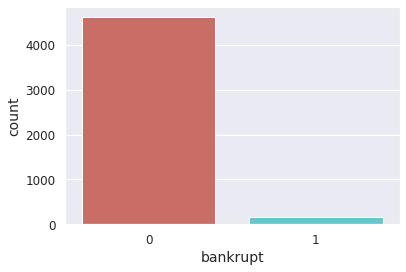

In [ ]:
# Analizando el target
sns.countplot(x = y_train, palette = 'hls')

### Data Train aplicando SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train_f, y_train.ravel())

In [ ]:
X_train_res.shape

(9238, 50)

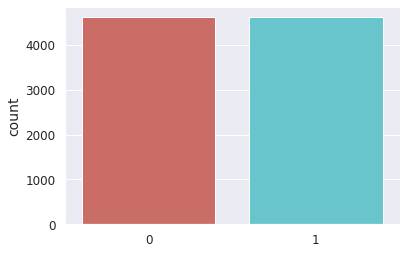

In [ ]:
# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
parameters = {'max_depth': np.array([3,5,7,9]),
              'n_estimators': np.array([5,20,50,100,300,500,1000]),
              'min_samples_leaf' : np.array([0.025, 0.05, 0.1, 0.2]),
              }

In [ ]:
# Entrenando modelo sin balancear
'''
import time

start_time = time.time()

rf_gs = GridSearchCV(RandomForestClassifier(random_state=202301,max_features=7),parameters,n_jobs=-1,
                   cv = 5,verbose = 5,refit = 'AUC',return_train_score = True)
rf_gs.fit(X_train_f,y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

print('....%s seconds ---' %   ((time.time() - start_time)))
'''

Fitting 5 folds for each of 112 candidates, totalling 560 fits
{'max_depth': 3, 'min_samples_leaf': 0.025, 'n_estimators': 5}
0.9677353002513529
....859.6956219673157 seconds ---


In [ ]:
# Entrenando modelo balanceado
'''
import time

start_time = time.time()

rf_gs_bal = GridSearchCV(RandomForestClassifier(random_state=202301,max_features=7),parameters,n_jobs=-1,
                   cv = 5,verbose = 5,refit = 'AUC',return_train_score = True)
rf_gs_bal.fit(X_train_res,y_train_res)
print(rf_gs_bal.best_params_)
print(rf_gs_bal.best_score_)

print('....%s seconds ---' %   ((time.time() - start_time)))
'''

Fitting 5 folds for each of 112 candidates, totalling 560 fits
{'max_depth': 7, 'min_samples_leaf': 0.025, 'n_estimators': 20}
0.9008457027542031
....1417.8884136676788 seconds ---


In [ ]:
# Modelo final sin balancear
rf = RandomForestClassifier(max_depth = 3,
                            min_samples_leaf = 0.025,
                            n_estimators = 5,
                            random_state=202301,
                            max_features=7
                            )

rf = rf.fit(X_train_f, y_train)

In [ ]:
y_pred_proba = rf.predict_proba(X_train_f)
auc = roc_auc_score(y_train,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.85334994081476


In [ ]:
y_pred_proba = rf.predict_proba(X_test_f)
auc = roc_auc_score(y_test1,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.8262090602999694


In [ ]:
# Modelo final  balancedo
rf_bal = RandomForestClassifier(max_depth = 7,
                            min_samples_leaf = 0.025,
                            n_estimators = 20,
                            random_state=202301,
                            max_features=7
                            )

rf_bal = rf_bal.fit(X_train_res,y_train_res)

In [ ]:
y_pred_proba = rf_bal.predict_proba(X_train_res)
auc = roc_auc_score(y_train_res,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.9348006794980364


In [ ]:
y_pred_proba = rf_bal.predict_proba(X_test_f)
auc = roc_auc_score(y_test1,y_pred_proba[:,1])

print('Gini Test: ',2*auc-1)

Gini Train:  0.8732323232323231


## 17. Modelo Decision Tree

### Modelo base

In [ ]:
from sklearn.tree import DecisionTreeClassifier

destree = DecisionTreeClassifier()
destree.fit(X_train[numeric_features_post_univ_se],y_train)
importances=destree.feature_importances_

# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Variable':list(X_train[numeric_features_post_univ_se].columns)}),
                              pd.DataFrame({'Importancia':list(destree.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Variable','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables.to_csv('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/featureImportance_dtree.csv',index=False)

### Analisis multivariado

In [ ]:
df_corr = X_train[numeric_features_post_univ_se].corr()
df_corr.to_excel('/content/gdrive/MyDrive/TrabajoFinal_ML&DL_DMC/Correlaciones_bankrupt_tree.xlsx')

In [ ]:
drop_varscorr = ['borrowing_dependency','equity_to_long_term_liability','liability_to_equity','current_liabilities_equity','current_liability_to_equity',
'cash_flow_to_sales','after_tax_net_interest_rate','working_capitcal_turnover_rate','operating_profit_rate','pre_tax_net_interest_rate',
'net_profit_before_tax_paid_in_capital','roa_b_before_interest_and_depreciation_after_tax','operating_profit_per_share_yuan_¥_',
'net_income_to_total_assets','roa_a_before_interest_and_%_after_tax','persistent_eps_in_the_last_four_seasons','per_share_net_profit_before_tax_yuan_¥_',
'operating_profit_paid_in_capital','retained_earnings_to_total_assets','working_capital_to_total_assets','net_value_per_share_c_','net_value_per_share_b_',
'operating_gross_margin','gross_profit_to_sales','current_liability_to_assets','equity_to_liability','debt_ratio_%','cash_reinvestment_%',
'cash_flow_to_total_assets','cash_flow_rate','cfo_to_assets','regular_net_profit_growth_rate']

In [ ]:
numeric_features_post_univ_se_corr = [x for x in numeric_features_post_univ_se if x not in drop_varscorr]

In [ ]:
print(' Nro variables inicial: ',len(numeric_features_post_univ_se))
print(' Nro variables a eliminar por ser correlaciones: ',len(drop_varscorr))
print(' Nro variables post correlaciones: ',len(numeric_features_post_univ_se_corr))

 Nro variables inicial:  81
 Nro variables a eliminar por ser correlaciones:  32
 Nro variables post correlaciones:  49


### Bases finales Train y Test

In [ ]:
X_train_f = X_train[numeric_features_post_univ_se_corr]
X_test_f  = X_test1[numeric_features_post_univ_se_corr]

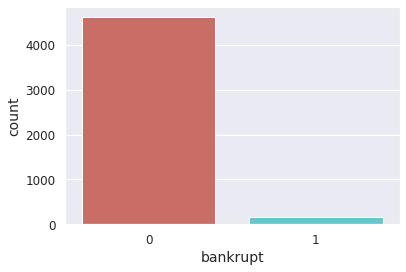

In [ ]:
# Analizando el target
sns.countplot(x = y_train, palette = 'hls')

### Data Train aplicando SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train_f, y_train.ravel())

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters = {'criterion':['entropy','gini'],
              'max_features' : np.array([6,7,8]),
              'max_depth': np.array([3,4,5,6,7]),
              'min_samples_leaf' : np.array([0.025, 0.05, 0.1, 0.2]),
              }

In [ ]:
# Entrenando modelo sin balancear
import time

start_time = time.time()

tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=202301),parameters,n_jobs=-1,cv = 5,verbose = 5,refit = 'AUC',return_train_score = True)
tree_gs.fit(X_train_f,y_train)
print(tree_gs.best_params_)
print(tree_gs.best_score_)

print('....%s seconds ---' %   ((time.time() - start_time)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 0.025}
0.9677353002513529
....10.961252689361572 seconds ---


In [ ]:
# Entrenando modelo balanceado

import time

start_time = time.time()

tree_gs_bal = GridSearchCV(DecisionTreeClassifier(random_state=202301),parameters,n_jobs=-1,cv = 5,verbose = 5,refit = 'AUC',return_train_score = True)
tree_gs_bal.fit(X_train_res,y_train_res)
print(tree_gs_bal.best_params_)
print(tree_gs_bal.best_score_)

print('....%s seconds ---' %   ((time.time() - start_time)))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 0.025}
0.8768134590549316
....23.82499384880066 seconds ---


In [ ]:
# Modelo final sin balancear
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion= 'entropy',
                              max_depth= 3,
                              max_features= 6,
                              min_samples_leaf= 0.025,
                              random_state=202301
                            )

tree = tree.fit(X_train_f, y_train)

In [ ]:
y_pred_proba = tree.predict_proba(X_train_f)
auc = roc_auc_score(y_train,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.835979564925224


In [ ]:
y_pred_proba = tree.predict_proba(X_test_f)
auc = roc_auc_score(y_test1,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.778374655647383


In [ ]:
# Modelo final  balancedo
tree_bal = DecisionTreeClassifier(criterion= 'gini',
                              max_depth= 6,
                              max_features= 6,
                              min_samples_leaf= 0.025,
                              random_state=202301
                            )

tree_bal = tree_bal.fit(X_train_res,y_train_res)

In [ ]:
y_pred_proba = tree_bal.predict_proba(X_train_res)
auc = roc_auc_score(y_train_res,y_pred_proba[:,1])

print('Gini Train: ',2*auc-1)

Gini Train:  0.9039536659695235


In [ ]:
y_pred_proba = tree_bal.predict_proba(X_test_f)
auc = roc_auc_score(y_test1,y_pred_proba[:,1])

print('Gini Test: ',2*auc-1)

Gini Test:  0.8421870217324763


## 18. Modelo Ada Boost